This is a demo for how to construct mixed field Ising model dynamics and extract chaos features use the OTOC class defined otoc.py.

In [1]:
from otoc import OTOC
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# How to initialize the class and get OTOC list
otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_temp=0.3)
otoc.analysis()
otoc.plot_otoc()

1. $h_z$ dependence (see short spin chain.ipynb)

In [14]:
tstep = 0.1
hz_max = 2.5
hz_step = 0.1
dt_min = 10
dt_max = 25

dtlist = np.arange(dt_min, dt_max,5)
hzlist = np.arange(0,hz_max,hz_step)
chilist = np.zeros((len(dtlist),len(hzlist)))
stdlist = np.zeros(len(hzlist))

for l,Dt in enumerate(dtlist):
    t_end = Dt + 5

    for k, hz in enumerate(hzlist):

        c_list = np.zeros(int(t_end/tstep)) 
        tlist = np.arange(0,t_end,tstep)
        otoc = OTOC.init(L=4, J=20, hz=hz, hx=1, mu='X', nu='Z', i=0, j=3, T=t_end, tstep=tstep, Dt=Dt, init_temp=1000)
        otoc.analysis()
        stdlist[k] = otoc.std

    std_inv = 1/stdlist
    chilist[l] = (std_inv - np.min(std_inv))/(np.max(std_inv)-np.min(std_inv))

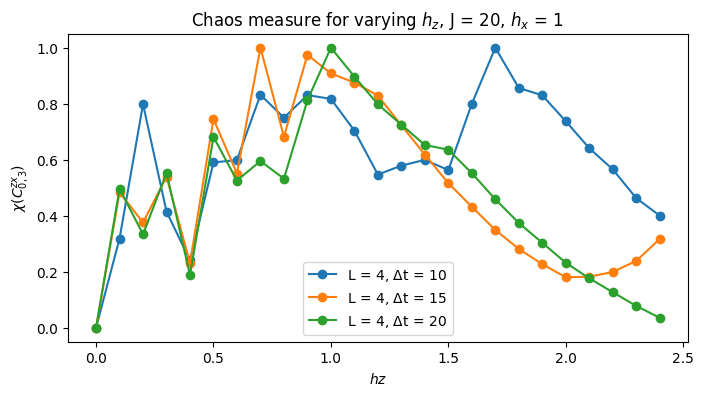

In [16]:
# Integrable limit: 𝜒 -> 0; Chaos limit: 𝜒 -> 1
plt.figure(figsize=(8,4))
for l, Dt in enumerate(dtlist):
    plt.plot(hzlist,chilist[l], "-o", label = rf'L = {otoc.mfim.L}, $\Delta$t = {Dt}')
plt.xlabel('$hz$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for varying $h_z$, J = {otoc.mfim.J}, $h_x$ = {otoc.mfim.hx}")
plt.legend()

2. Initial state dependence (thermal state at $T_0$)

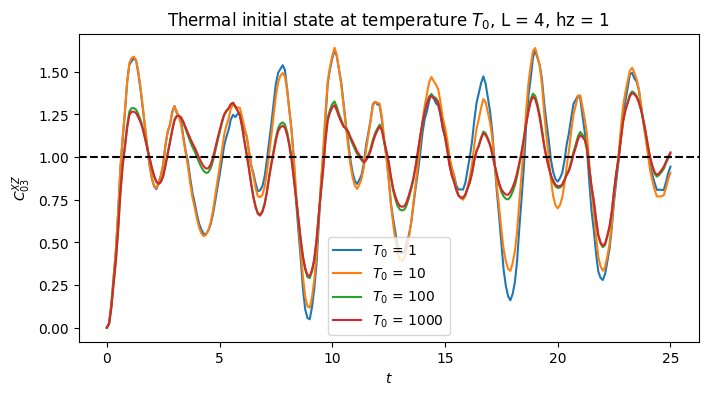

In [4]:
temp_list = [1,10,100,1000]

plt.figure(figsize=(8,4))

for temp in temp_list:
    otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_temp=temp)
    otoc.analysis()
    plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.init_temp}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"Thermal initial state at temperature $T_0$, L = {otoc.mfim.L}, hz = {otoc.mfim.hz}")
plt.legend()
plt.show()


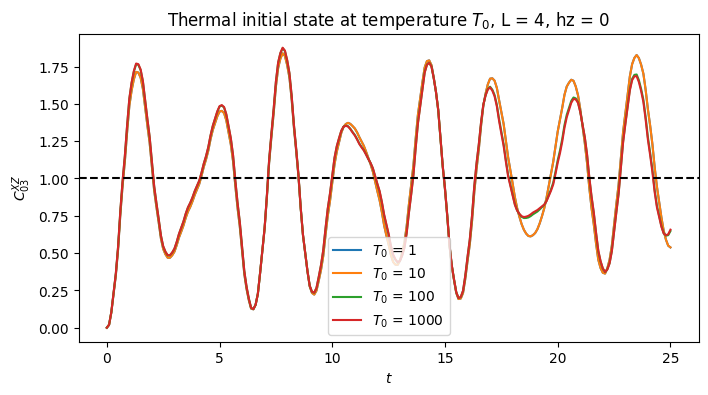

In [5]:
temp_list = [1,10,100,1000]

plt.figure(figsize=(8,4))

for temp in temp_list:
    otoc = OTOC.init(L=4, J=20, hz=0, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_temp=temp)
    otoc.analysis()
    plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.init_temp}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"Thermal initial state at temperature $T_0$, L = {otoc.mfim.L}, hz = {otoc.mfim.hz}")
plt.legend()
plt.show()


Looks like the initial state dependence only becomes important in the more chaotic regime. Lower temperature $\rightarrow$ integrable. Now extract $\chi$ for varying initial temperature:

In [ ]:
templist = np.logspace(0,3,num=10)
hzlist = np.arange(0,2.5,0.5)
chilist = np.zeros((len(dtlist),len(hzlist)))
stdlist = np.zeros(len(hzlist))

plt.figure(figsize=(8,4))

for temp in temp_list:
    otoc = OTOC.init(L=4, J=20, hz=0, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_temp=temp)
    otoc.analysis()
    plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.init_temp}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"Thermal initial state at temperature $T_0$, L = {otoc.mfim.L}, hz = {otoc.mfim.hz}")
plt.legend()
plt.show()